In [1]:
import pandas as pd
import numpy as np

medals = pd.read_csv('all_medalists.csv', encoding='latin-1')
medals.tail(5)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold
29215,Beijing,2008,Wrestling,Wrestling Gre-R,"BAROEV, Khasan",RUS,Men,96 - 120kg,M,Silver


In [2]:
#USA_edition_grouped = medals.loc[medals.NOC == 'USA'].groupby('Edition')
#USA_edition_grouped['Medal'].count()

In [3]:
country_names = medals['NOC']

In [4]:
medal_counts = country_names.value_counts()
medal_counts.head(15)

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64

In [5]:
counted = medals.pivot_table(index='NOC', columns='Medal', values='Athlete', aggfunc='count')
counted.head()

Medal,Bronze,Gold,Silver
NOC,,,
AFG,1.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,4.0,2.0
ANZ,5.0,20.0,4.0
ARG,88.0,68.0,83.0


In [6]:
counted['totals'] = counted.sum(axis='columns')

In [7]:
counted = counted.sort_values('totals', ascending=False)
counted.head(15)

Medal,Bronze,Gold,Silver,totals
NOC,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0
GER,454.0,407.0,350.0,1211.0
AUS,413.0,293.0,369.0,1075.0
HUN,345.0,400.0,308.0,1053.0
SWE,325.0,347.0,349.0,1021.0


In [8]:
ev_gen = medals[['Gender','Event_gender']]
ev_gen_uniques = ev_gen.drop_duplicates()
ev_gen_uniques

,Gender,Event_gender
0,Men,M
348,Men,X
416,Women,W
639,Women,X
23675,Men,W


In [9]:
medals_by_gender = medals.groupby(['Event_gender', 'Gender'])
medals_by_gender

In [10]:
medal_count_by_gender = medals_by_gender.count()
medal_count_by_gender

City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218

In [11]:
sus = medals.loc[(medals.Event_gender == "W") & (medals.Gender =='Men')]

In [12]:
suspect = pd.DataFrame(sus)
suspect

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
23675,Sydney,2000,Athletics,Athletics,"CHEPCHUMBA, Joyce",KEN,Men,marathon,W,Bronze


### Constructing alternative country rankings

In [13]:
country_grouped = medals.groupby('NOC')
country_grouped

In [14]:
Nsports = country_grouped['Sport'].nunique()
Nsports = Nsports.sort_values(ascending=False)
Nsports.head(15)

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64

In [15]:
# Counting USA vs USSR Cold War Olympic Sports
during_cold_war = (medals['Edition'] >= 1952) & (medals['Edition'] <= 1988)
#during_cold_war
is_usa_urs = medals.NOC.isin(['USA','URS'])
#is_usa_urs
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]
#cold_war_medals
country_grouped = cold_war_medals.groupby('NOC')
Nsports = country_grouped['Sport'].nunique().sort_values(ascending=False)
Nsports

NOC
URS    21
USA    20
Name: Sport, dtype: int64

In [16]:
medals_won_by_country = medals.pivot_table(index = 'Edition',
                                          columns = 'NOC',
                                          values = 'Athlete',
                                          aggfunc='count')
#medals_won_by_country

In [17]:
cold_war_usa_urs_medals = medals_won_by_country.loc[1952:1988, ['USA', 'URS']]
cold_war_usa_urs_medals

NOC,USA,URS
Edition,,
1952,130.0,117.0
1956,118.0,169.0
1960,112.0,169.0
1964,150.0,174.0
1968,149.0,188.0
1972,155.0,211.0
1976,155.0,285.0
1980,NaN,442.0
1984,333.0,NaN


In [18]:
most_medals = cold_war_usa_urs_medals.idxmax(axis='columns')
most_medals.value_counts()

URS    8
USA    2
dtype: int64

### Reshaping DataFrames for visualization

In [22]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [23]:
all_medals = medals.groupby('Edition')['Athlete'].count()
all_medals.head(6)

Edition
1896     151
1900     512
1904     470
1908     804
1912     885
1920    1298
Name: Athlete, dtype: int64

<IPython.core.display.Javascript object>


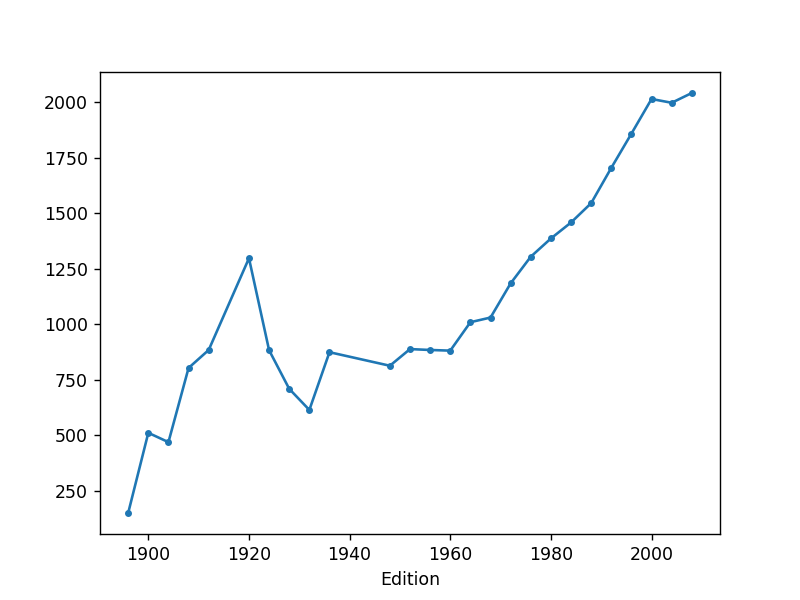

In [24]:
all_medals.plot(kind='line', marker='.')
plt.show()

In [25]:
france = medals.NOC == 'FRA'
france_grps = medals[france].groupby(['Edition','Medal'])
france_grps['Athlete'].count().head(10)

Edition  Medal 
1896     Bronze     2
         Gold       5
         Silver     4
1900     Bronze    53
         Gold      46
         Silver    86
1908     Bronze    21
         Gold       9
         Silver     5
1912     Bronze     5
Name: Athlete, dtype: int64

In [26]:
france_medals = france_grps['Athlete'].count().unstack()
france_medals.head(12)

Medal,Bronze,Gold,Silver
Edition,,,
1896,2.0,5.0,4.0
1900,53.0,46.0,86.0
1908,21.0,9.0,5.0
1912,5.0,10.0,10.0
1920,55.0,13.0,73.0
1924,20.0,39.0,63.0
1928,13.0,7.0,16.0
1932,6.0,23.0,8.0
1936,18.0,12.0,13.0


<IPython.core.display.Javascript object>


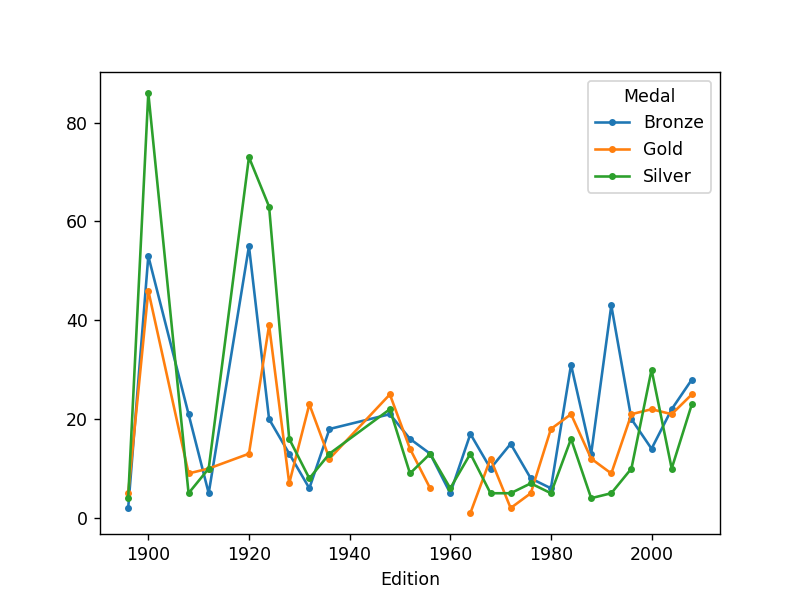

In [27]:
france_medals.plot(kind='line', marker='.')
plt.show()

In [31]:
usa = medals.loc[medals['NOC'] == 'USA']
usa.head(3)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
11,Athens,1896,Athletics,Athletics,"LANE, Francis",USA,Men,100m,M,Bronze
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold


<IPython.core.display.Javascript object>


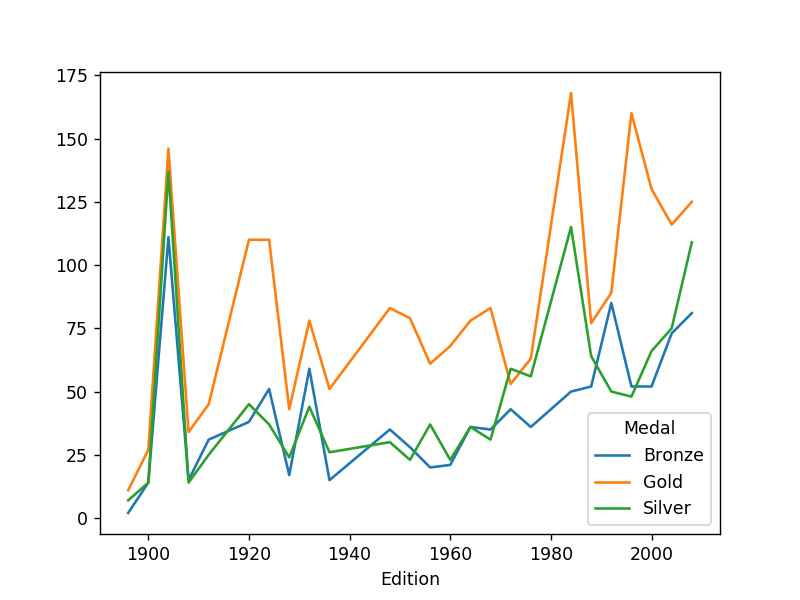

In [38]:
usa_medals_by_year = usa.groupby(['Edition','Medal'])['Athlete'].count()
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')
usa_medals_by_year.plot()
plt.show()

<IPython.core.display.Javascript object>


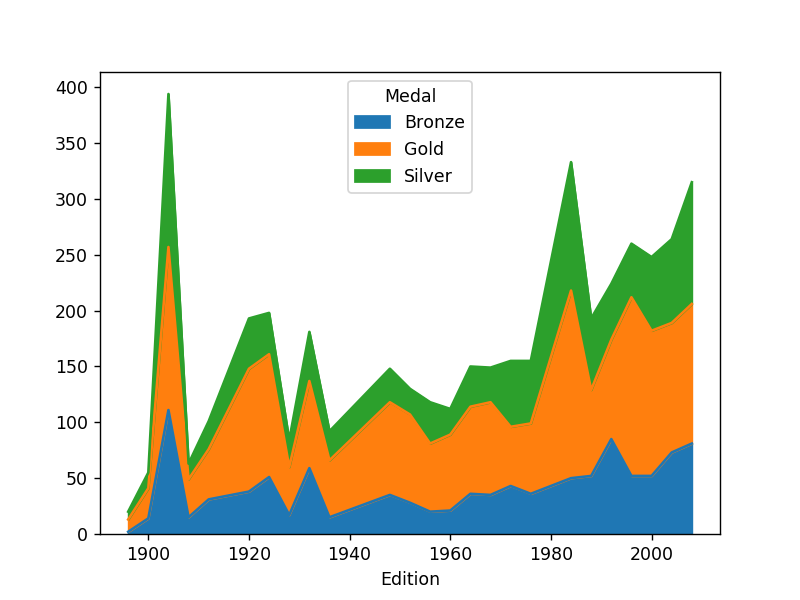

In [40]:
usa_medals_by_year.plot.area()
plt.show()

<IPython.core.display.Javascript object>


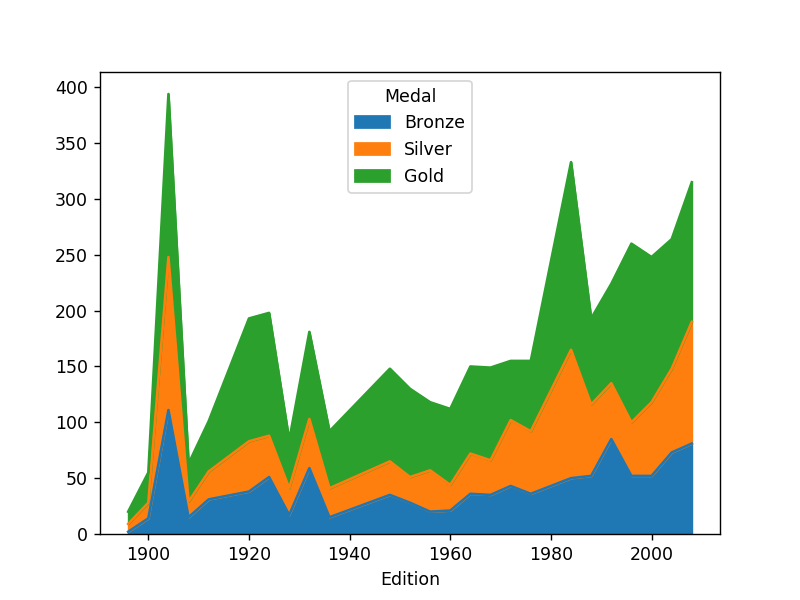

In [42]:
medals.Medal = pd.Categorical(values=medals.Medal, 
                              categories=['Bronze', 'Silver','Gold'],
                             ordered=True)
usa = medals[medals.NOC == 'USA']
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')
usa_medals_by_year.plot.area()
plt.show()